In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [60]:
bicycle_df = pd.read_csv("./Fremont_Bridge_Bicycle_Counter.csv", index_col='Date', parse_dates=True)
bicycle_df.columns = ['Total', 'East', 'West']
bicycle_df.shape

(138542, 3)

In [61]:
bicycle_df = bicycle_df.fillna(0)

In [62]:
bicycle_df.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [63]:
East_mean = bicycle_df.East.mean()
bicycle_df.query('East < @East_mean')

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
...,...,...,...
2020-12-31 19:00:00,27.0,11.0,16.0
2020-12-31 20:00:00,18.0,9.0,9.0
2020-12-31 21:00:00,18.0,9.0,9.0


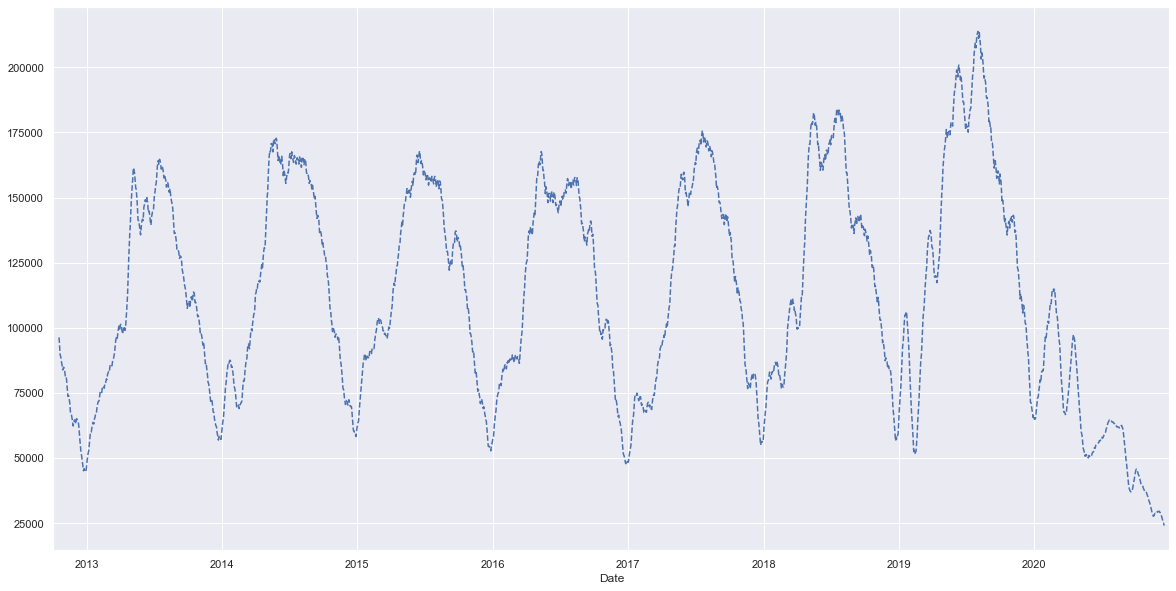

In [50]:
daily = bicycle_df['Total'].resample('D').sum()
daily.rolling(30, center=True, win_type='gaussian').sum(std=10).plot(figsize=(20, 10), style="--")

In [102]:
weekday = np.where(bicycle_df.index.weekday < 5, 'Weekday', 'Weekend')
by_weekday_and_time = bicycle_df.groupby([weekday, bicycle_df.index.time]).mean()

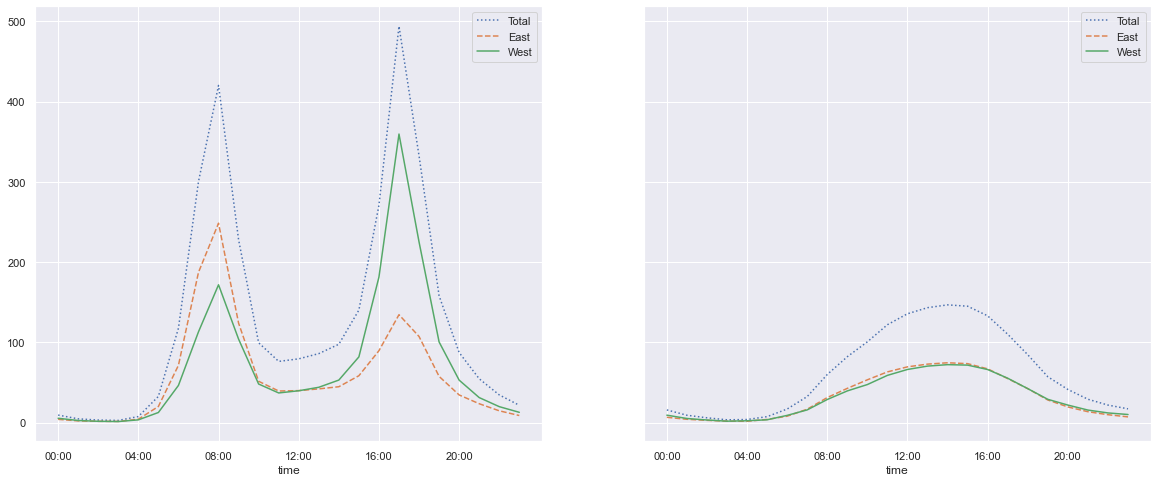

In [121]:
hourly_ticks = 4 * 3600 * np.arange(6)
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
by_weekday_and_time.loc['Weekday'].plot(ax=ax[0], xticks=hourly_ticks, style=[':', '--', '-'])
by_weekday_and_time.loc['Weekend'].plot(ax=ax[1], xticks=hourly_ticks, style=[':', '--', '-']);